In [170]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [5]:
df_cal=pd.read_csv('a/calendar.csv')
df_sat=pd.read_csv('a/sales_train_validation.csv')
df_sam=pd.read_csv('a/sample_submission.csv')
df_sep=pd.read_csv('a/sell_prices.csv')

In [6]:
print(list(df_cal.columns))
print(list(df_sat.columns))
print(list(df_sam.columns))
print(list(df_sep.columns))

['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI']
['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_

In [7]:
df_sat.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

In [8]:
mc=df_sat.corr()

In [9]:
from seaborn import heatmap

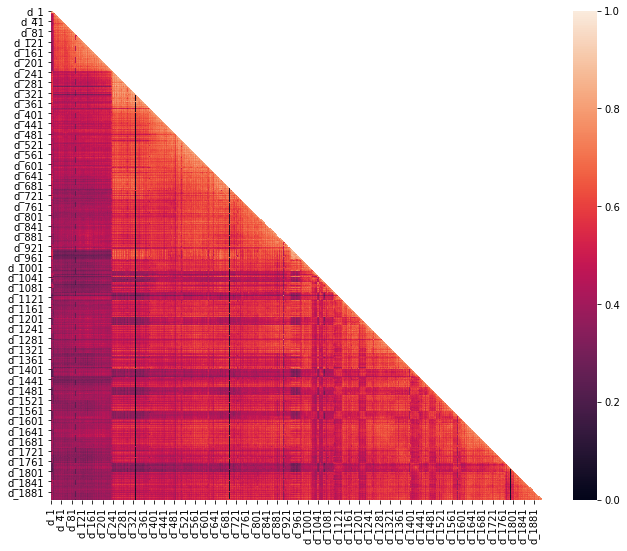

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(mc, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap(mc, mask=mask)

def filtro(x):
    if x>0.7:
        return 1
    else:
        return 0
        
mcf=mc.apply(lambda x: filtro(x))

In [13]:
df_sat.shape

(30490, 1919)

In [41]:
df_sat

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [15]:
df_sep.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [26]:
df_sep[(df_sep.item_id=='HOBBIES_1_001') & (df_sep.wm_yr_wk==11325)]

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
2029797,CA_4,HOBBIES_1_001,11325,9.58
2708822,TX_1,HOBBIES_1_001,11325,9.58
4800944,WI_1,HOBBIES_1_001,11325,9.58


In [52]:
df_cal.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [31]:
df_cal.event_name_2.unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [32]:
df_cal.event_type_1.unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [33]:
df_cal.event_type_2.unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

In [39]:
df_cal.tail(50)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1919,2016-05-01,11614,Sunday,2,5,2016,d_1920,OrthodoxEaster,Religious,NaN,NaN,1,1,0
1920,2016-05-02,11614,Monday,3,5,2016,d_1921,NaN,NaN,NaN,NaN,1,0,1
1921,2016-05-03,11614,Tuesday,4,5,2016,d_1922,NaN,NaN,NaN,NaN,1,1,1
1922,2016-05-04,11614,Wednesday,5,5,2016,d_1923,NaN,NaN,NaN,NaN,1,0,0
1923,2016-05-05,11614,Thursday,6,5,2016,d_1924,Cinco De Mayo,Cultural,NaN,NaN,1,1,1
1924,2016-05-06,11614,Friday,7,5,2016,d_1925,NaN,NaN,NaN,NaN,1,1,1
1925,2016-05-07,11615,Saturday,1,5,2016,d_1926,NaN,NaN,NaN,NaN,1,1,0
1926,2016-05-08,11615,Sunday,2,5,2016,d_1927,Mother's day,Cultural,NaN,NaN,1,0,1
1927,2016-05-09,11615,Monday,3,5,2016,d_1928,NaN,NaN,NaN,NaN,1,1,1
1928,2016-05-10,11615,Tuesday,4,5,2016,d_1929,NaN,NaN,NaN,NaN,1,0,0


In [154]:
df_cal.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [155]:
#calendario dummies
df_cal.month=df_cal.month.apply(lambda x:str(x))
df_cal_dum=pd.get_dummies(df_cal[['event_type_1','event_type_2','weekday','month','snap_CA','snap_TX','snap_WI','wm_yr_wk']])
df_cal_dum

,snap_CA,snap_TX,snap_WI,wm_yr_wk,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0,0,0,11101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,11101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,11101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,11101,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,11101,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0,1,1,11620,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1965,0,0,0,11620,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1966,0,0,0,11620,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1967,0,0,0,11621,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [167]:
#Extraccion de dia(s) y transposición
df_sat_d=df_sat.drop(columns=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
df_sell=df_sat_d.iloc[0].T
df_data=df_cal_dum.copy()
df_sell.reset_index(drop=True,inplace=True,name='day_sell')

#Completar la serie para igualar el numero de registros de dias
for i in range(56):
    df_sell=df_sell.append(pd.Series([None]))

#Integracion de las ventas al Set de datos
df_data['day_sell']=df_sell.values

In [168]:
df_data

,snap_CA,snap_TX,snap_WI,wm_yr_wk,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_type_2_Cultural,event_type_2_Religious,...,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_sell
0,0,0,0,11101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,11101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,11101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,11101,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,1,11101,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0,1,1,11620,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,None
1965,0,0,0,11620,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,None
1966,0,0,0,11620,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,None
1967,0,0,0,11621,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,None


In [172]:
sell_price =pd.Series([])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
for i in tqdm(range(len(df_data))):
    try:
        x=df_sep[(df_sep.store_id==df_sat['store_id'].iloc[0])&(df_sep.item_id==df_sat['item_id'].iloc[0])&(df_sep.wm_yr_wk==df_data['wm_yr_wk'].iloc[0])]['sell_price'].iloc[0] #Numero en item y city serà el indice del producto
    except:
        x=None
    sell_price=sell_price.append(pd.Series([x]))

In [169]:
#Creacion de Serie de precios de venta segun semana Walmart



None


In [ ]:
#Extraer dia(s) de training

#Incluir Dato de calendario dummies

#Incluir Dato de Precios completados